# Lab 1

Juan Angel Carrera 20593

Esteban Aldana Guerra 20591

José Mariano Reyes 20074

## Task 1

### 1. ¿Qué pasa si algunas acciones tienen probabilidades de cero?

Si algunas acciones tienen probabilidades de cero en una política, significa que esas acciones nunca serán seleccionadas por el agente. Esto puede tener varias implicaciones:

Reducción del espacio de exploración: El agente nunca explorará esas acciones, lo que podría llevar a perder oportunidades potencialmente beneficiosas.
Posible suboptimalidad: Si una acción con probabilidad cero es en realidad la mejor acción en algún estado, el agente nunca aprenderá a utilizarla, llevando a un rendimiento subóptimo.
Problemas de convergencia: En algunos algoritmos de aprendizaje por refuerzo, las probabilidades de cero pueden causar problemas de convergencia o división por cero en cálculos.


### 2. ¿Qué pasa si la política es determinística?
### a. π₁(a) = 1 para algún a

Cuando la política es determinística, significa que para cada estado, el agente siempre elige la misma acción con certeza. En el caso específico donde π₁(a) = 1 para alguna acción a:

No hay exploración: El agente siempre seleccionará la acción a en ese estado, sin explorar otras opciones.
Explotación pura: El agente solo explota el conocimiento actual sin buscar mejores alternativas.
Posible estancamiento: Si la acción elegida no es óptima, el agente no podrá mejorar su política.
Simplificación de cálculos: En algunos algoritmos, una política determinística puede simplificar cálculos al eliminar la necesidad de considerar múltiples acciones posibles.

### 3. Investigue y defina a qué se le conoce como cada uno de los siguientes términos, asegúrese de definir en qué consiste cada una de estas variaciones y cómo difieren de los k-armed bandits

#### a. Contextual bandits:
Los contextual bandits son una variación del problema de k-armed bandits donde el agente recibe información contextual antes de tomar una decisión.
Características principales:

- Se proporciona un contexto o característica antes de cada decisión.
- Las recompensas dependen tanto de la acción elegida como del contexto.
- El agente debe aprender a asociar contextos con acciones óptimas.

En los k-armed bandits estándar, no hay información contextual y las recompensas solo dependen de la acción elegida.

#### b. Dueling bandits:
Los dueling bandits son una variación donde el agente compara pares de acciones en lugar de seleccionar una única acción en cada iteración.
Características principales:

- El agente selecciona dos acciones en cada iteración.
- Recibe feedback sobre cuál de las dos acciones es preferible.
- El objetivo es identificar la mejor acción global a través de comparaciones por pares.

En los k-armed bandits estándar, se selecciona y evalúa una sola acción a la vez, mientras que en dueling bandits se comparan pares de acciones.

#### c. Combination bandits:
Los combination bandits (también conocidos como combination bandits) son una variación donde el agente selecciona una combinación de acciones en lugar de una sola acción.
Características principales:

- El espacio de acción consiste en combinaciones de elementos básicos.
- El agente debe seleccionar un subconjunto de acciones en cada iteración.
- Las recompensas dependen de la combinación completa seleccionada.

En los k-armed bandits estándar, se selecciona una única acción de un conjunto fijo, mientras que en combination bandits se seleccionan múltiples acciones o una combinación de ellas.

## Task 2

1. Crea una clase Bandit para representar el entorno. Esta clase debería inicializar 10 brazos, cada uno con
una probabilidad de recompensa elegida al azar entre 0 y 1.

2. La clase debe tener un método pull(arm) que devuelva una recompensa de 1 con la probabilidad específica
del brazo elegido y 0 en caso contrario.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Clase Bandit: entorno de multi-armed bandits
class Bandit:
    def __init__(self, n_arms=10):
        self.n_arms = n_arms
        self.probabilities = np.random.random(n_arms)
    
    # Método para tirar de un brazo
    def pull(self, arm):
        return 1 if np.random.random() < self.probabilities[arm] else 0

3. Cree una clase de Agent para implementar la estrategia de épsilon-greedy.

4. Inicialice el agente con un valor épsilon específico para la exploración, una matriz para almacenar las
recompensas estimadas para cada brazo (inicializada en cero) y una matriz para contar la cantidad de
veces que se ha extraído cada brazo.

5. Implemente un método select_arm() en la clase Agent que:

    a. Con probabilidad épsilon, selecciona un brazo aleatorio.

    b. Con probabilidad 1−ϵ, selecciona el brazo con la recompensa estimada más alta.
    
6. Implemente un método update_estimates(arm, recompensa) para actualizar la recompensa estimada para
el brazo elegido usando la fórmula vista en clase


In [2]:
# Clase Agent: agente que interactúa con el bandit
class Agent:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.estimated_rewards = np.zeros(n_arms)
        self.arm_counts = np.zeros(n_arms)
    
    # Selección de brazo usando epsilon-greedy
    def select_arm(self):
        if np.random.random() < self.epsilon:
            return np.random.randint(self.n_arms)  # Exploración
        else:
            return np.argmax(self.estimated_rewards)  # Explotación
    
    # Actualización de estimaciones de recompensa
    def update_estimates(self, arm, reward):
        self.arm_counts[arm] += 1
        n = self.arm_counts[arm]
        self.estimated_rewards[arm] = ((n - 1) / n) * self.estimated_rewards[arm] + (1 / n) * reward

7. Inicialice Bandit y Agent con épsilon configurado en 0.1.

8. Ejecute la simulación para 1,000 iteraciones.

9. En cada prueba, seleccione un brazo usando select_arm(), tire del brazo en el entorno Bandit para obtener
una recompensa y actualice las recompensas estimadas usando update_estimates().


In [3]:
# Ejecutar simulación
def run_simulation(epsilon, n_iterations=1000):
    bandit = Bandit()
    agent = Agent(n_arms=10, epsilon=epsilon)
    
    cumulative_reward = 0
    cumulative_rewards = []
    
    for _ in range(n_iterations):
        arm = agent.select_arm()
        reward = bandit.pull(arm)
        agent.update_estimates(arm, reward)
        cumulative_reward += reward
        cumulative_rewards.append(cumulative_reward)
    
    print(f"Epsilon: {epsilon}, Total reward: {cumulative_reward}")
    
    return cumulative_rewards, agent.estimated_rewards, bandit.probabilities

11. Grafique la recompensa acumulada en las pruebas para visualizar la mejora del desempeño del agente.


In [4]:
# Graficar recompensa acumulada
def plot_cumulative_rewards(cumulative_rewards_list, epsilons):
    plt.figure(figsize=(10, 5))
    for cr, eps in zip(cumulative_rewards_list, epsilons):
        plt.plot(cr, label=f'ε = {eps}')
    plt.title("Recompensa Acumulada")
    plt.xlabel("Iteraciones")
    plt.ylabel("Recompensa Acumulada")
    plt.legend()
    plt.show()


12. Grafique los valores estimados de cada brazo versus las probabilidades reales para evaluar la precisión de
las estimaciones.

In [5]:
# Graficar estimaciones vs probabilidades reales
def plot_estimated_vs_true_probabilities(estimated_rewards_list, true_probabilities, epsilons):
    n_arms = len(true_probabilities)
    fig, axs = plt.subplots(len(epsilons), 1, figsize=(10, 5*len(epsilons)), sharex=True)
    fig.suptitle("Estimaciones vs Reales")
    
    for i, (er, eps) in enumerate(zip(estimated_rewards_list, epsilons)):
        axs[i].bar(range(n_arms), true_probabilities, alpha=0.5, label='Reales')
        axs[i].bar(range(n_arms), er, alpha=0.5, label='Estimadas')
        axs[i].set_ylabel("Probabilidad")
        axs[i].set_title(f'ε = {eps}')
        axs[i].legend()
    
    axs[-1].set_xlabel("Brazo")
    plt.tight_layout()
    plt.show()

Epsilon: 0.01, Total reward: 604
Epsilon: 0.1, Total reward: 833
Epsilon: 0.5, Total reward: 599


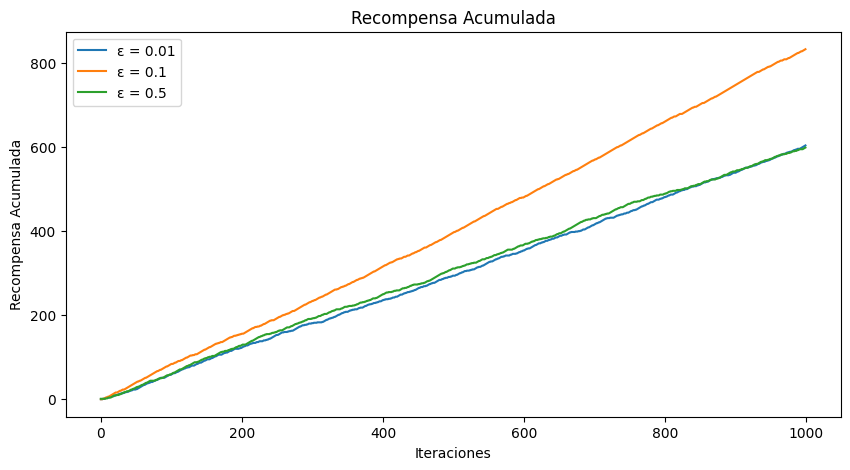

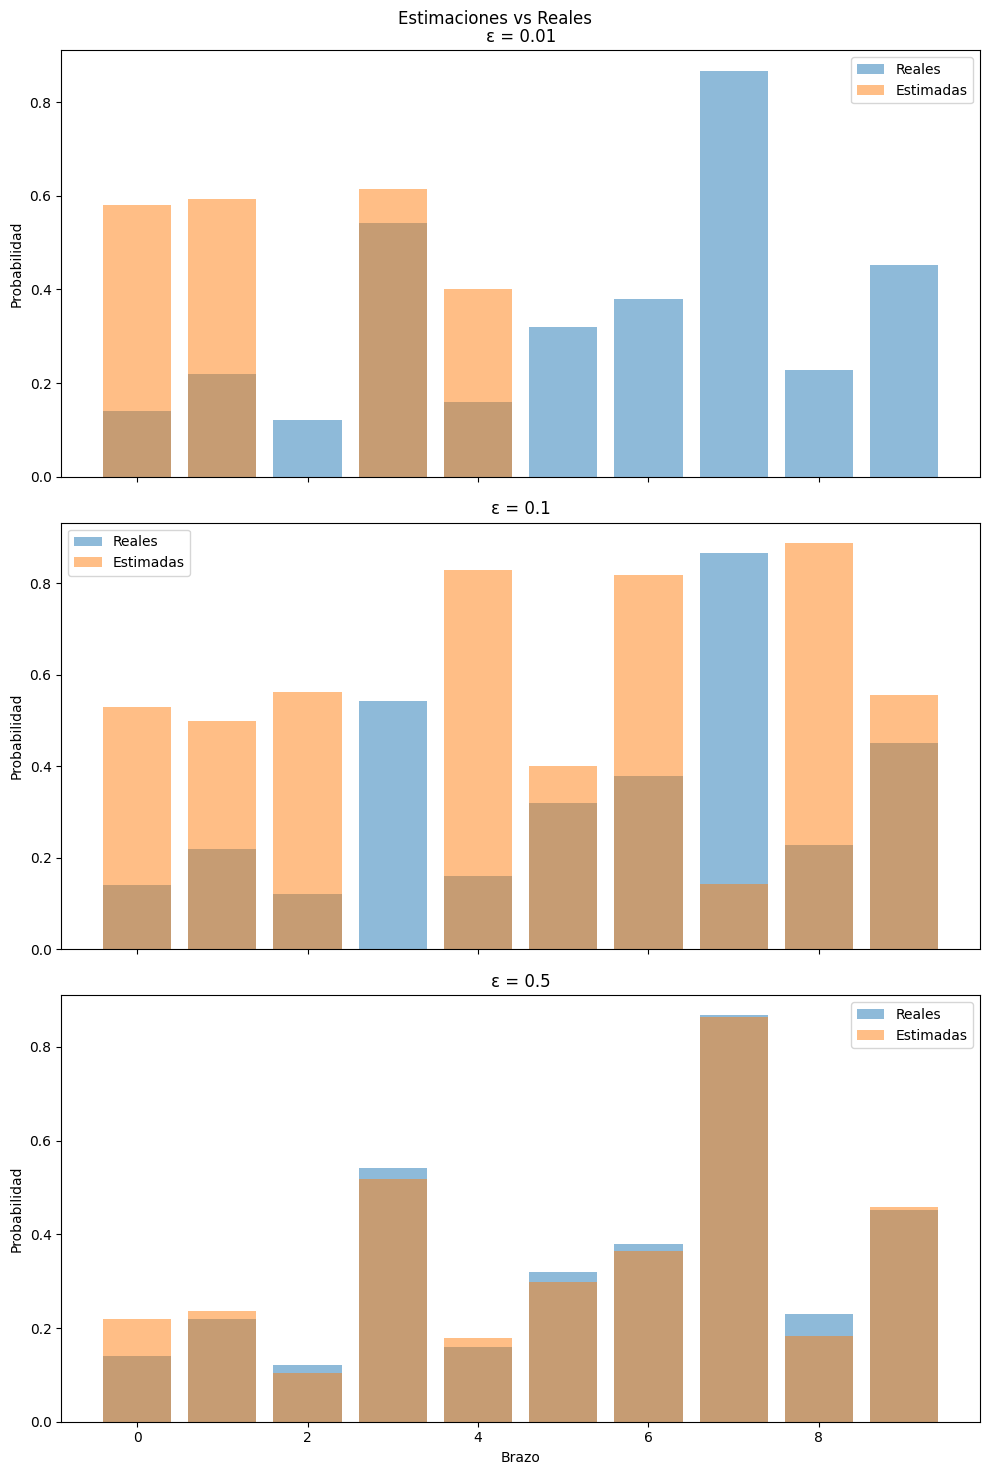

In [6]:
# Código principal
if __name__ == "__main__":
    epsilons = [0.01, 0.1, 0.5]
    cumulative_rewards_list = []
    estimated_rewards_list = []
    
    for epsilon in epsilons:
        cr, er, true_prob = run_simulation(epsilon)
        cumulative_rewards_list.append(cr)
        estimated_rewards_list.append(er)
    
    plot_cumulative_rewards(cumulative_rewards_list, epsilons)
    plot_estimated_vs_true_probabilities(estimated_rewards_list, true_prob, epsilons)